In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/temp/

Mounted at /content/drive
/content/drive/My Drive/temp


In [3]:
#read data
df_n_ = pd.read_excel('hbeam_l_n_train.xls')
df_32_ = pd.read_excel('hbeam_l_dg32_train.xls')
df_48_ = pd.read_excel('hbeam_l_dg48_train.xls')
df_64_ = pd.read_excel('hbeam_l_dg64_train.xls')
df_96_ = pd.read_excel('hbeam_l_dg96_train.xls')

In [4]:
item_types = ['n', '32', '48', '64', '96']

In [5]:
input={}
sensor_a={}
temp={} 
df_={}

In [6]:
def create_dataframe(item):
  input[item] = eval('df_{}_'.format(item)).iloc[0:2688, 0:5].div(1, axis=0)
  sensor_a[item] = eval('df_{}_'.format(item)).iloc[0:2688,84:89].div(10, axis=0)
  temp[item] = eval('df_{}_'.format(item)).iloc[0:2688,97:99].div(1, axis=0)
  df_[item] = pd.concat([input[item], sensor_a[item], temp[item]], axis=1, sort=False )

In [7]:
#creating dataframe
for item in item_types:
  create_dataframe(item)

In [8]:
item_dict = { item:{} for item in item_types}

In [9]:
# create dictionary for each item
def creat_dict(item):
  row_start = 0
  row_end = 32
  df_name_counter = 1

  for i in range(1,6):
    item_dict[item]['input_{0}'.format(str(df_name_counter))] = df_[item].iloc[row_start:row_end,0:5].div(1, axis=0)
    item_dict[item]['sensor_a_{0}'.format(str(df_name_counter))] = df_[item].iloc[row_start:row_end,5:12].div(1, axis=0)
    item_dict[item]['sensor_b_{0}'.format(str(df_name_counter))] = pd.concat([item_dict[item]['input_{0}'.format(str(df_name_counter))], item_dict[item]['sensor_a_{0}'.format(str(df_name_counter))]], axis=1, sort=False)
    row_start = row_end
    row_end = row_end + 32
    df_name_counter += 1

In [10]:
for item in item_types:
  creat_dict(item)

In [11]:
sen_dict = {}
df_name_counter = 1  

for i in range (1,6):
    sen_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    sen_dict["input_{0}".format(str(df_name_counter))] = pd.concat([item_dict[item]["sensor_a_{0}".format(str(df_name_counter))] for item in item_types])
    # sen_dict["input_{0}".format(str(df_name_counter))] = pd.concat([item_dict['n']["sensor_a_{0}".format(str(df_name_counter))],
    #                                                                    item_dict['32']["sensor_a_{0}".format(str(df_name_counter))],
    #                                                                    item_dict['48']["sensor_a_{0}".format(str(df_name_counter))],
    #                                                                    item_dict['64']["sensor_a_{0}".format(str(df_name_counter))],
    #                                                                    item_dict['96']["sensor_a_{0}".format(str(df_name_counter))]])
    df_name_counter += 1
    

In [12]:
scaled_data_dict = {}
scaled_data_Normalizer_dict = {}
df_name_counter = 1  

for i in range (1,6):
    scaler = Normalizer()
    scaled_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    scaled_data_dict["input_{0}".format(str(df_name_counter))] = scaler.fit_transform(sen_dict["input_{0}".format(str(df_name_counter))].values)
    scaled_data_Normalizer_dict["input_{0}".format(str(df_name_counter))]= pd.DataFrame(scaled_data_dict["input_{0}".format(str(df_name_counter))],
                                                                                      columns = ['S_1', 'S_2','S_3', 'S_4','S_5','T_1','T_2'])
    df_name_counter += 1 

In [13]:
sklearn_pca = PCA(n_components=2)
reduced_data_dict = {}
real_data_dict = {}
df_name_counter = 1  
 
for i in range (1,6):

    reduced_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    reduced_data_dict["input_{0}".format(str(df_name_counter))] = sklearn_pca.fit_transform(scaled_data_dict["input_{0}".format(str(df_name_counter))])
    real_data_dict["input_{0}".format(str(df_name_counter))] = sklearn_pca.inverse_transform(reduced_data_dict["input_{0}".format(str(df_name_counter))])
    reduced_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame(reduced_data_dict["input_{0}".format(str(df_name_counter))], columns = ['Dimension 1', 'Dimension 2'])
    df_name_counter += 1
    

In [14]:
df_name_counter = 1
range_n_clusters_data_dict = {}

for i in range (1,6):
    # Create range of clusters 
    range_n_clusters_data_dict["input_{0}".format(str(df_name_counter))] = list(range(2,6))
    df_name_counter += 1


In [15]:
cluster_data_dict = {}
pred_data_dict = {}
sample_pred_data_dict = {}
centers_data_dict = {}
score_data_dict = {}
df_name_counter = 1 

for i in range (1,6):
    for n_clusters in range_n_clusters_data_dict["input_{0}".format(str(df_name_counter))]:
        cluster_data_dict["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
         
        model = KMeans(algorithm='auto', init='k-means++', max_iter=10000,n_clusters=n_clusters, 
                       n_jobs=None, precompute_distances='auto',random_state=0, tol=0.0001, verbose=0)
        
        #Train the model 
        cluster_data_dict["input_{0}".format(str(df_name_counter))] = model.fit(reduced_data_dict["input_{0}".format(str(df_name_counter))])
        
        pred_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].predict(reduced_data_dict["input_{0}".format(str(df_name_counter))])
        
        centers_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].cluster_centers_
        
        sample_pred_data_dict["input_{0}".format(str(df_name_counter))] = cluster_data_dict["input_{0}".format(str(df_name_counter))].predict(reduced_data_dict["input_{0}".format(str(df_name_counter))])
       
        score_data_dict["input_{:02d}".format(df_name_counter)] = silhouette_score(reduced_data_dict["input_{0}".format(str(df_name_counter))], 
                                                                                   pred_data_dict["input_{0}".format(str(df_name_counter))], metric='euclidean')       
    df_name_counter += 1

In [16]:
def cluster_results(reduced_data, preds, centers):

    predictions = pd.DataFrame(pred_data_dict["input_{0}".format(str(df_name_counter))], columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data_dict["input_{0}".format(str(df_name_counter))]], axis = 1)

	# Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

	# Color map
    cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2',  \
                    color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30, fontsize = 14);

	# Set plot title
    ax.set_title("Clusters - Normal/3.2/4.8/6.4/9.6 DG = INPUT No:{0}".format(str(df_name_counter)), fontsize = 20)

In [17]:
# Display the predictions
df_name_counter = 1 
for i in range (1,6):
    for i, (pred, sample) in enumerate(zip(pred_data_dict["input_{0}".format(str(df_name_counter))], reduced_data_dict["input_{0}".format(str(df_name_counter))].values)):
        print( "Input No:{0}".format(str(df_name_counter)),"Sample point", i, "predicted to be in Cluster", pred)
        print ("Data for this sample: ", sample)
        print ("-----")
    df_name_counter += 1

Input No:1 Sample point 0 predicted to be in Cluster 0
Data for this sample:  [ 0.01076818 -0.00926886]
-----
Input No:1 Sample point 1 predicted to be in Cluster 0
Data for this sample:  [ 0.01064042 -0.00922073]
-----
Input No:1 Sample point 2 predicted to be in Cluster 0
Data for this sample:  [ 0.01081689 -0.00928771]
-----
Input No:1 Sample point 3 predicted to be in Cluster 0
Data for this sample:  [ 0.01064217 -0.0092223 ]
-----
Input No:1 Sample point 4 predicted to be in Cluster 0
Data for this sample:  [ 0.01077954 -0.00927411]
-----
Input No:1 Sample point 5 predicted to be in Cluster 0
Data for this sample:  [ 0.01067988 -0.00923609]
-----
Input No:1 Sample point 6 predicted to be in Cluster 0
Data for this sample:  [ 0.01078659 -0.009276  ]
-----
Input No:1 Sample point 7 predicted to be in Cluster 0
Data for this sample:  [ 0.01092425 -0.00932741]
-----
Input No:1 Sample point 8 predicted to be in Cluster 0
Data for this sample:  [ 0.01108916 -0.00938959]
-----
Input No:1

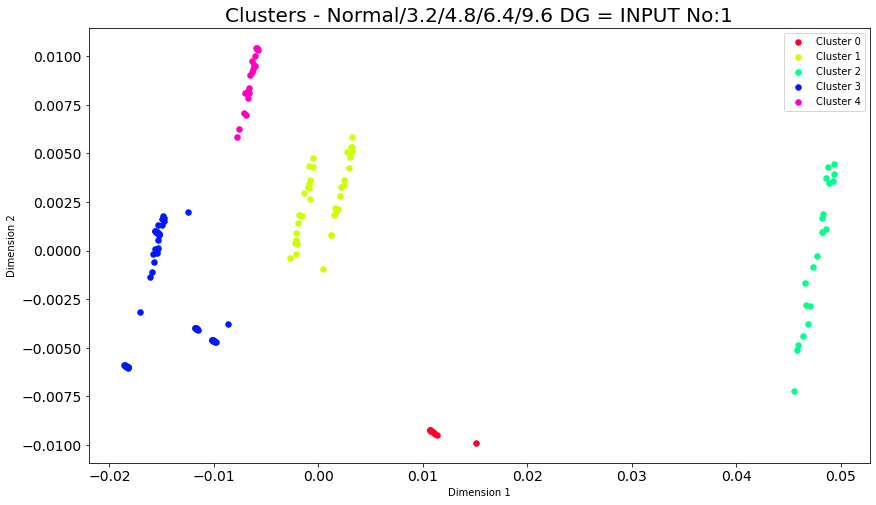

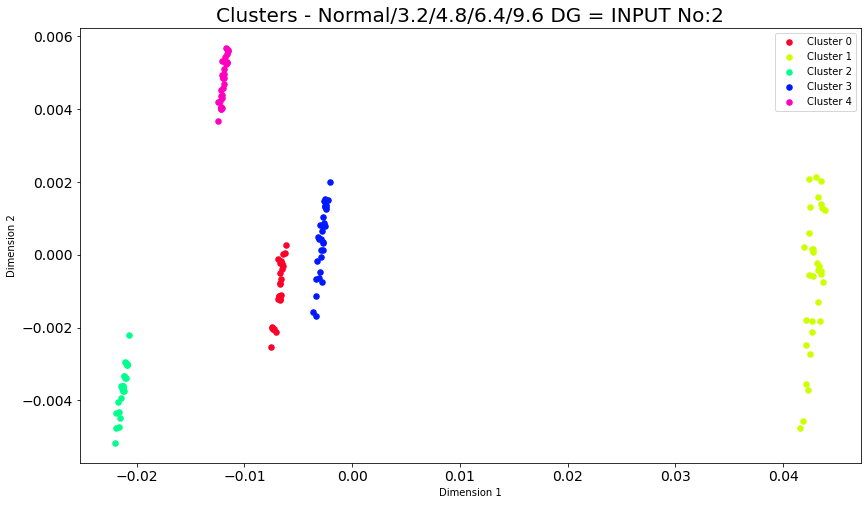

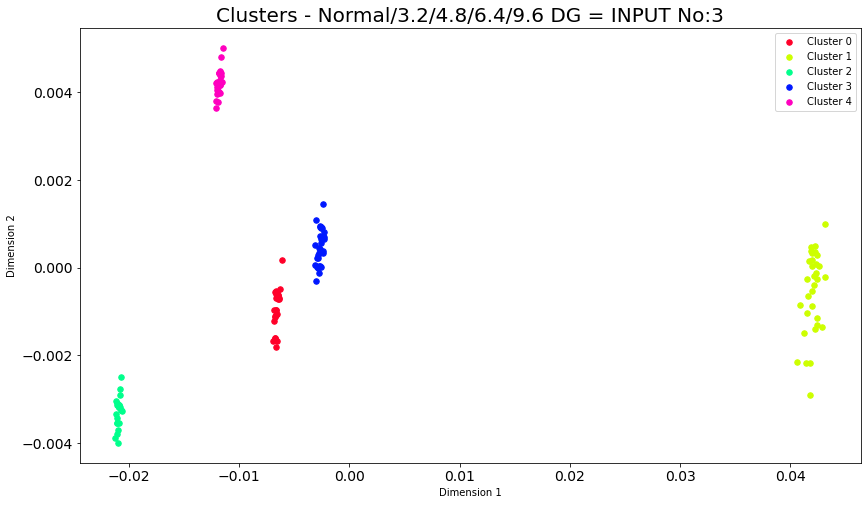

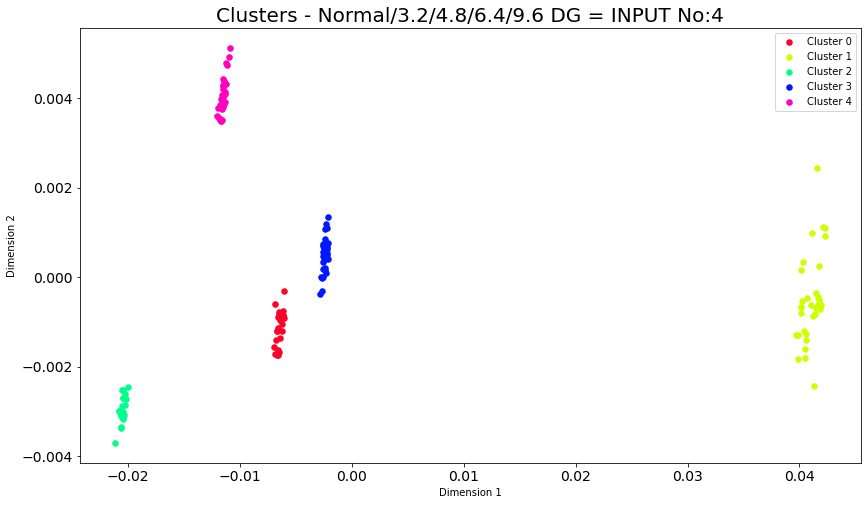

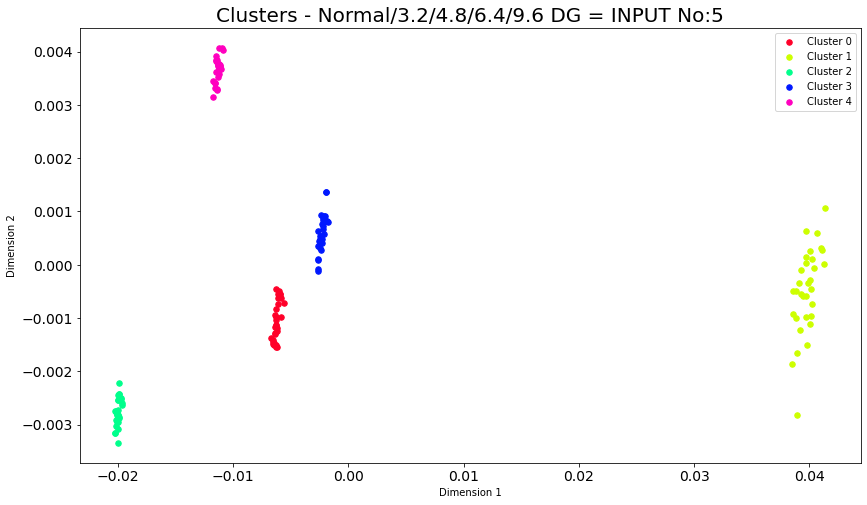

In [18]:
cluster_results_data_dict = {}
df_name_counter = 1
for i in range (1,6):
    cluster_results(reduced_data_dict["input_{0}".format(str(df_name_counter))], pred_data_dict["input_{0}".format(str(df_name_counter))], 
                    centers_data_dict["input_{0}".format(str(df_name_counter))])
    df_name_counter += 1

clusters_input_data_dict_train = {}
df_name_counter = 1
for i in range (1,6):
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))] = pd.DataFrame()
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['Dimension 1'] = reduced_data_dict['input_{0}'.format(str(df_name_counter))]['Dimension 1']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['Dimension 2'] = reduced_data_dict['input_{0}'.format(str(df_name_counter))]['Dimension 2']
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['Input Number'] = df_name_counter
    clusters_input_data_dict_train["input_{0}".format(str(df_name_counter))]['Cluster'] = pred_data_dict["input_{0}".format(str(df_name_counter))]
    df_name_counter += 1



alldb_kmean_clusters_train = pd.DataFrame(columns=['Dimension 1', 'Dimension 2','Input Number', 'Cluster'])
alldb_kmean_clusters_train = [clusters_input_data_dict_train['input_2'],clusters_input_data_dict_train['input_3'],
                              clusters_input_data_dict_train['input_4'],clusters_input_data_dict_train['input_5']]
alldb_kmean_clusters_train = pd.concat(alldb_kmean_clusters_train)   

d1 = alldb_kmean_clusters_train.iloc[:,0:1].div(1, axis=0) 
d2 = alldb_kmean_clusters_train.iloc[:,1:2].div(1, axis=0) 
input = alldb_kmean_clusters_train.iloc[:,2:3].div(1, axis=0)
label = alldb_kmean_clusters_train.iloc[:,3:4].div(1, axis=0)

Supervised_Training_db_pca_sens_temp= pd.concat([d1,d2,input,label], axis=1, sort=False)

Training set score: 0.887500
Test set score: 0.837500
--- 1.5552380084991455 Seconds ---
------------------------------------------------------------

[[11  0  0  7 19]
 [ 0 39  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 31  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

         0.0       1.00      0.30      0.46        37
         1.0       1.00      1.00      1.00        39
         2.0       1.00      1.00      1.00        27
         3.0       0.82      1.00      0.90        31
         4.0       0.58      1.00      0.73        26

    accuracy                           0.84       160
   macro avg       0.88      0.86      0.82       160
weighted avg       0.90      0.84      0.81       160


------------------------------------------------------------


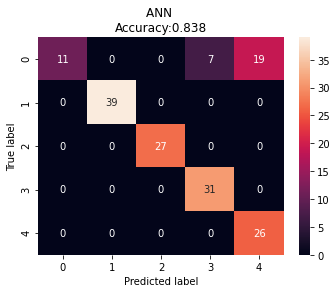

In [19]:
# MLP ANN Optimized Model

df_cls = Supervised_Training_db_pca_sens_temp
X=df_cls.iloc[:,0:3].values
y=df_cls.iloc[:,3:4].values
#scaler = StandardScaler()
#X=scaler.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
start_time = time.time()
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 7), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
clf.fit(X_train, y_train)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
print("--- %s Seconds ---" % (time.time() - start_time))
print("------------------------------------------------------------")
print()
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print()
print("------------------------------------------------------------")

y_mlp_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_mlp_pred) 
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('ANN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_mlp_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show() 